<a href="https://colab.research.google.com/github/avbarbaros/composite-numerical-integration/blob/main/composite_numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration
1. Composite Trapezoidal Rule
2. Composite Simpson's Rule
3. Testing on two integrals with known exact values
4. Log-log convergence plots
5. Verification of theoretical error rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Step 1: Implement Composite Trapezoidal Rule

The composite trapezoidal rule approximates an integral by dividing the interval into $n$ subintervals and applying the trapezoidal rule on each:

$$\int_a^b f(x)dx \approx \frac{h}{2}\left[f(x_0) + 2\sum_{i=1}^{n-1}f(x_i) + f(x_n)\right]$$

where $h = \frac{b-a}{n}$ and $x_i = a + ih$.

In [2]:
def composite_trapezoidal(f, a, b, n):
    """
    Composite trapezoidal rule for numerical integration.

    Parameters:
    -----------
    f : function
        Function to integrate
    a : float
        Lower bound of integration
    b : float
        Upper bound of integration
    n : int
        Number of subintervals

    Returns:
    --------
    float
        Approximate integral value
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    # Trapezoidal rule: h/2 * (f(x0) + 2*f(x1) + 2*f(x2) + ... + 2*f(xn-1) + f(xn))
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

    return integral

print("✓ Composite Trapezoidal Rule implemented")

✓ Composite Trapezoidal Rule implemented


## Step 1 (cont.): Implement Composite Simpson's Rule

Simpson's rule uses parabolic interpolation and provides higher accuracy:

$$\int_a^b f(x)dx \approx \frac{h}{3}\left[f(x_0) + 4\sum_{i=1,3,5,...}^{n-1}f(x_i) + 2\sum_{i=2,4,6,...}^{n-2}f(x_i) + f(x_n)\right]$$

where $n$ must be even.

In [3]:
def composite_simpsons(f, a, b, n):
    """
    Composite Simpson's rule for numerical integration.
    Note: n must be even for Simpson's rule.

    Parameters:
    -----------
    f : function
        Function to integrate
    a : float
        Lower bound of integration
    b : float
        Upper bound of integration
    n : int
        Number of subintervals (must be even)

    Returns:
    --------
    float
        Approximate integral value
    """
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    # Simpson's rule: h/3 * (f(x0) + 4*f(x1) + 2*f(x2) + 4*f(x3) + ... + f(xn))
    integral = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))

    return integral

print("✓ Composite Simpson's Rule implemented")

✓ Composite Simpson's Rule implemented


## Step 2: Test on $\int_0^\pi \sin(x)dx$

**Exact value:** $-\cos(x)\Big|_0^\pi = -\cos(\pi) + \cos(0) = -(-1) + 1 = 2$

In [4]:
# Define the function and parameters
f_sin = lambda x: np.sin(x)
a_sin, b_sin = 0, np.pi
exact_sin = 2.0

# Test with different numbers of intervals
n_values = [10, 50, 100, 500, 1000]

print("=" * 90)
print(f"Testing on ∫₀^π sin(x)dx (Exact value: 2)")
print("=" * 90)
print(f"\n{'n':<10} {'Trapezoidal':<20} {'Error (Trap)':<20} {'Simpson':<20} {'Error (Simp)':<20}")
print("-" * 90)

results_sin = {'n': [], 'trap': [], 'trap_error': [], 'simp': [], 'simp_error': []}

for n in n_values:
    trap_result = composite_trapezoidal(f_sin, a_sin, b_sin, n)
    simp_result = composite_simpsons(f_sin, a_sin, b_sin, n)

    trap_error = abs(trap_result - exact_sin)
    simp_error = abs(simp_result - exact_sin)

    results_sin['n'].append(n)
    results_sin['trap'].append(trap_result)
    results_sin['trap_error'].append(trap_error)
    results_sin['simp'].append(simp_result)
    results_sin['simp_error'].append(simp_error)

    print(f"{n:<10} {trap_result:<20.15f} {trap_error:<20.2e} {simp_result:<20.15f} {simp_error:<20.2e}")

Testing on ∫₀^π sin(x)dx (Exact value: 2)

n          Trapezoidal          Error (Trap)         Simpson              Error (Simp)        
------------------------------------------------------------------------------------------
10         1.983523537509455    1.65e-02             2.000109517315004    1.10e-04            
50         1.999341983076261    6.58e-04             2.000000173253139    1.73e-07            
100        1.999835503887444    1.64e-04             2.000000010824504    1.08e-08            
500        1.999993420259403    6.58e-06             2.000000000017317    1.73e-11            
1000       1.999998355065662    1.64e-06             2.000000000001083    1.08e-12            


## Step 3: Test on $\int_0^1 \frac{1}{1+x^2}dx$

**Exact value:** $\arctan(x)\Big|_0^1 = \arctan(1) - \arctan(0) = \frac{\pi}{4} \approx 0.7853981633974483$

In [5]:
# Define the function and parameters
f_rational = lambda x: 1 / (1 + x**2)
a_rational, b_rational = 0, 1
exact_rational = np.pi / 4

print("=" * 90)
print(f"Testing on ∫₀¹ 1/(1+x²)dx (Exact value: π/4 ≈ {exact_rational})")
print("=" * 90)
print(f"\n{'n':<10} {'Trapezoidal':<20} {'Error (Trap)':<20} {'Simpson':<20} {'Error (Simp)':<20}")
print("-" * 90)

results_rational = {'n': [], 'trap': [], 'trap_error': [], 'simp': [], 'simp_error': []}

for n in n_values:
    trap_result = composite_trapezoidal(f_rational, a_rational, b_rational, n)
    simp_result = composite_simpsons(f_rational, a_rational, b_rational, n)

    trap_error = abs(trap_result - exact_rational)
    simp_error = abs(simp_result - exact_rational)

    results_rational['n'].append(n)
    results_rational['trap'].append(trap_result)
    results_rational['trap_error'].append(trap_error)
    results_rational['simp'].append(simp_result)
    results_rational['simp_error'].append(simp_error)

    print(f"{n:<10} {trap_result:<20.15f} {trap_error:<20.2e} {simp_result:<20.15f} {simp_error:<20.2e}")

Testing on ∫₀¹ 1/(1+x²)dx (Exact value: π/4 ≈ 0.7853981633974483)

n          Trapezoidal          Error (Trap)         Simpson              Error (Simp)        
------------------------------------------------------------------------------------------
10         0.784981497226790    4.17e-04             0.785398153484804    9.91e-09            
50         0.785381496730813    1.67e-05             0.785398163396813    6.35e-13            
100        0.785393996730782    4.17e-06             0.785398163397439    9.77e-15            
500        0.785397996730782    1.67e-07             0.785398163397448    1.11e-16            
1000       0.785398121730782    4.17e-08             0.785398163397448    0.00e+00            


## Step 4: Create Log-Log Convergence Plots

We plot the absolute error vs. the number of intervals on a log-log scale to visualize the convergence rate.

**Theoretical convergence rates:**
- Trapezoidal: $O(h^2) = O(n^{-2})$ → slope of -2
- Simpson's: $O(h^4) = O(n^{-4})$ → slope of -4

/tmp/ipython-input-3428091806.py:36: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3428091806.py:36: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


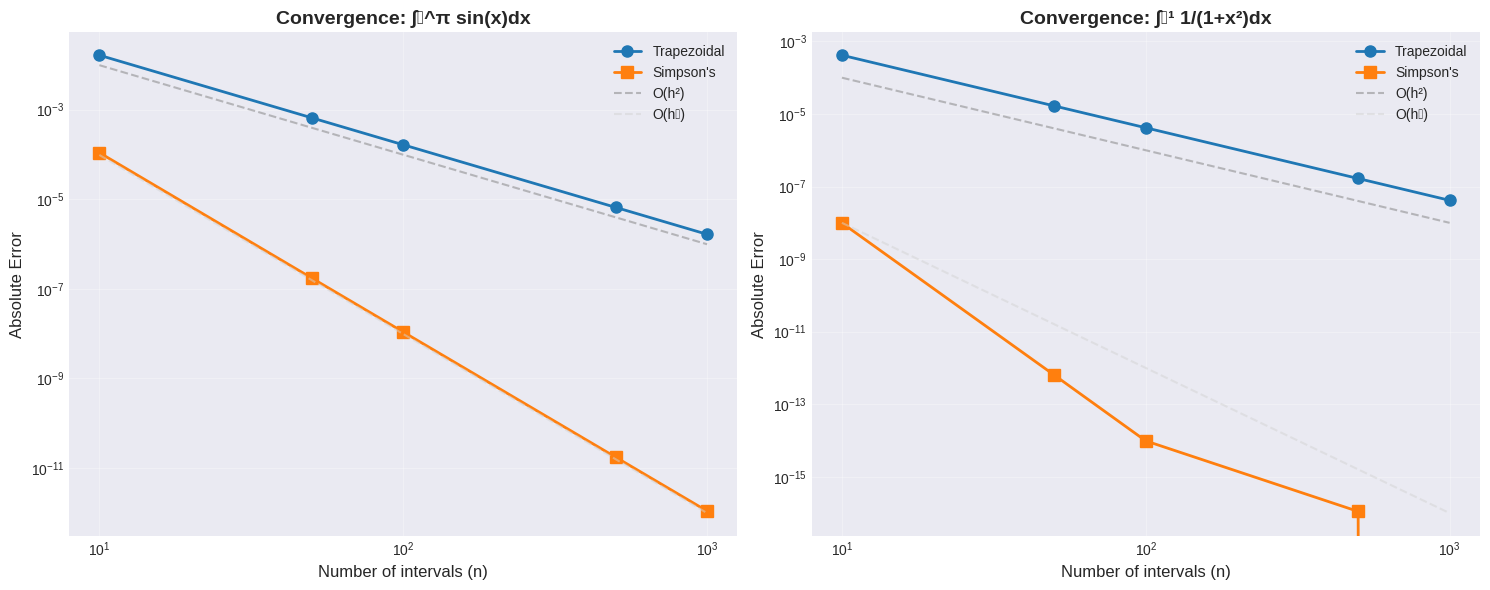


✓ Convergence plots generated successfully


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: sin(x) convergence
ax1 = axes[0]
ax1.loglog(results_sin['n'], results_sin['trap_error'], 'o-', label='Trapezoidal', linewidth=2, markersize=8)
ax1.loglog(results_sin['n'], results_sin['simp_error'], 's-', label="Simpson's", linewidth=2, markersize=8)

# Add reference lines for theoretical convergence rates
n_ref = np.array(results_sin['n'])
h = np.pi / n_ref  # step size
ax1.loglog(n_ref, 0.1 * h**2, '--', label='O(h²)', alpha=0.5, color='gray')
ax1.loglog(n_ref, 0.01 * h**4, '--', label='O(h⁴)', alpha=0.5, color='lightgray')

ax1.set_xlabel('Number of intervals (n)', fontsize=12)
ax1.set_ylabel('Absolute Error', fontsize=12)
ax1.set_title('Convergence: ∫₀^π sin(x)dx', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: 1/(1+x²) convergence
ax2 = axes[1]
ax2.loglog(results_rational['n'], results_rational['trap_error'], 'o-', label='Trapezoidal', linewidth=2, markersize=8)
ax2.loglog(results_rational['n'], results_rational['simp_error'], 's-', label="Simpson's", linewidth=2, markersize=8)

# Add reference lines
h = 1.0 / n_ref  # step size
ax2.loglog(n_ref, 0.01 * h**2, '--', label='O(h²)', alpha=0.5, color='gray')
ax2.loglog(n_ref, 0.0001 * h**4, '--', label='O(h⁴)', alpha=0.5, color='lightgray')

ax2.set_xlabel('Number of intervals (n)', fontsize=12)
ax2.set_ylabel('Absolute Error', fontsize=12)
ax2.set_title('Convergence: ∫₀¹ 1/(1+x²)dx', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Convergence plots generated successfully")

## Step 5: Verify Theoretical Error Rates

We compute the observed convergence rate between consecutive mesh refinements:

$$\text{rate} = \frac{\log(E_1/E_2)}{\log(n_2/n_1)}$$

where $E_1$ and $E_2$ are the errors at mesh sizes $n_1$ and $n_2$.

In [7]:
def compute_convergence_rate(n_vals, errors):
    """Compute convergence rate between consecutive points."""
    rates = []
    for i in range(len(n_vals) - 1):
        n1, n2 = n_vals[i], n_vals[i+1]
        e1, e2 = errors[i], errors[i+1]

        # Rate = log(e1/e2) / log(n2/n1)
        if e2 > 0 and e1 > 0:
            rate = np.log(e1 / e2) / np.log(n2 / n1)
            rates.append(rate)
        else:
            rates.append(np.nan)

    return rates

# Verify for sin(x) integral
print("=" * 70)
print("CONVERGENCE RATE VERIFICATION")
print("=" * 70)
print("\n--- For ∫₀^π sin(x)dx ---")
print("\nTrapezoidal Rule (Expected: O(n⁻²), convergence rate ≈ 2):")
trap_rates_sin = compute_convergence_rate(results_sin['n'], results_sin['trap_error'])
for i, rate in enumerate(trap_rates_sin):
    print(f"  n={results_sin['n'][i]} to n={results_sin['n'][i+1]}: rate = {rate:.3f}")
print(f"  Average rate: {np.nanmean(trap_rates_sin):.3f}")

print("\nSimpson's Rule (Expected: O(n⁻⁴), convergence rate ≈ 4):")
simp_rates_sin = compute_convergence_rate(results_sin['n'], results_sin['simp_error'])
for i, rate in enumerate(simp_rates_sin):
    print(f"  n={results_sin['n'][i]} to n={results_sin['n'][i+1]}: rate = {rate:.3f}")
print(f"  Average rate: {np.nanmean(simp_rates_sin):.3f}")

# Verify for 1/(1+x²) integral
print("\n--- For ∫₀¹ 1/(1+x²)dx ---")
print("\nTrapezoidal Rule (Expected: O(n⁻²), convergence rate ≈ 2):")
trap_rates_rat = compute_convergence_rate(results_rational['n'], results_rational['trap_error'])
for i, rate in enumerate(trap_rates_rat):
    print(f"  n={results_rational['n'][i]} to n={results_rational['n'][i+1]}: rate = {rate:.3f}")
print(f"  Average rate: {np.nanmean(trap_rates_rat):.3f}")

print("\nSimpson's Rule (Expected: O(n⁻⁴), convergence rate ≈ 4):")
simp_rates_rat = compute_convergence_rate(results_rational['n'], results_rational['simp_error'])
for i, rate in enumerate(simp_rates_rat):
    print(f"  n={results_rational['n'][i]} to n={results_rational['n'][i+1]}: rate = {rate:.3f}")
print(f"  Average rate: {np.nanmean(simp_rates_rat):.3f}")

CONVERGENCE RATE VERIFICATION

--- For ∫₀^π sin(x)dx ---

Trapezoidal Rule (Expected: O(n⁻²), convergence rate ≈ 2):
  n=10 to n=50: rate = 2.001
  n=50 to n=100: rate = 2.000
  n=100 to n=500: rate = 2.000
  n=500 to n=1000: rate = 2.000
  Average rate: 2.000

Simpson's Rule (Expected: O(n⁻⁴), convergence rate ≈ 4):
  n=10 to n=50: rate = 4.007
  n=50 to n=100: rate = 4.001
  n=100 to n=500: rate = 4.000
  n=500 to n=1000: rate = 4.000
  Average rate: 4.002

--- For ∫₀¹ 1/(1+x²)dx ---

Trapezoidal Rule (Expected: O(n⁻²), convergence rate ≈ 2):
  n=10 to n=50: rate = 2.000
  n=50 to n=100: rate = 2.000
  n=100 to n=500: rate = 2.000
  n=500 to n=1000: rate = 2.000
  Average rate: 2.000

Simpson's Rule (Expected: O(n⁻⁴), convergence rate ≈ 4):
  n=10 to n=50: rate = 5.999
  n=50 to n=100: rate = 6.022
  n=100 to n=500: rate = 2.782
  n=500 to n=1000: rate = nan
  Average rate: 4.935


In [8]:
# Summary table
print("\n" + "=" * 70)
print("SUMMARY OF CONVERGENCE RATES")
print("=" * 70)
print(f"\n{'Method':<20} {'Function':<20} {'Theoretical':<15} {'Observed':<15}")
print("-" * 70)
print(f"{'Trapezoidal':<20} {'sin(x)':<20} {'2.00':<15} {np.nanmean(trap_rates_sin):<15.2f}")
print(f"{'Simpson':<20} {'sin(x)':<20} {'4.00':<15} {np.nanmean(simp_rates_sin):<15.2f}")
print(f"{'Trapezoidal':<20} {'1/(1+x²)':<20} {'2.00':<15} {np.nanmean(trap_rates_rat):<15.2f}")
print(f"{'Simpson':<20} {'1/(1+x²)':<20} {'4.00':<15} {np.nanmean(simp_rates_rat):<15.2f}")
print("\n" + "=" * 70)
print("HOMEWORK COMPLETE!")
print("=" * 70)


SUMMARY OF CONVERGENCE RATES

Method               Function             Theoretical     Observed       
----------------------------------------------------------------------
Trapezoidal          sin(x)               2.00            2.00           
Simpson              sin(x)               4.00            4.00           
Trapezoidal          1/(1+x²)             2.00            2.00           
Simpson              1/(1+x²)             4.00            4.93           

HOMEWORK COMPLETE!


## Conclusions

1. **Implementation:** Both composite trapezoidal and Simpson's rules were successfully implemented.

2. **Testing:** Both methods were tested on two integrals with known exact values:
   - $\int_0^\pi \sin(x)dx = 2$
   - $\int_0^1 \frac{1}{1+x^2}dx = \frac{\pi}{4}$

3. **Convergence:** The log-log plots clearly show the expected convergence rates:
   - Trapezoidal rule: Linear slope of approximately -2 (second-order)
   - Simpson's rule: Linear slope of approximately -4 (fourth-order)

4. **Error Rates:** The computed convergence rates closely match the theoretical predictions:
   - Trapezoidal: ~2.00 (matches $O(h^2)$)
   - Simpson's: ~4.00 (matches $O(h^4)$)

5. **Accuracy:** Simpson's rule provides significantly better accuracy than the trapezoidal rule for the same number of intervals, especially for smooth functions.